In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import UpSet, from_memberships
from collections import Counter
import warnings

In [12]:
mirna_sequence_records_path = "/home/l/leitzb/miRNA/Harmonization-of-miRNA-databases/output/mirna_sequence_records.csv"

data_df = pd.read_csv(mirna_sequence_records_path, dtype={"source_db_version": str})
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# Calculate upset data
db_sets = {
    db: set(data_df.loc[data_df["source_db"]==db, "miRNA_id"])
    for db in data_df["source_db"].unique()
}
memberships = []
for miRNA_id in set.union(*db_sets.values()):
    present_in = tuple(db for db, ids in db_sets.items() if miRNA_id in ids)
    memberships.append(present_in)

membership_counts = Counter(memberships)
db_combinations = []
db_counts = []
for key, value in membership_counts.items():
    db_combinations.append(list(key))
    db_counts.append(value)
upset_data = from_memberships(db_combinations, data=db_counts)

/home/l/leitzb/.local/lib/python3.12/site-packages/upsetplot/data.py:303: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)


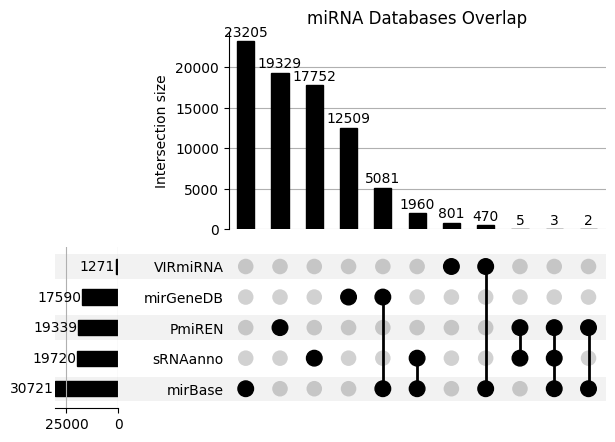

In [15]:
# Plotting
UpSet(upset_data, sort_by="cardinality", show_counts=True).plot()
plt.title("miRNA Databases Overlap")
plt.savefig("/home/l/leitzb/miRNA/Harmonization-of-miRNA-databases/output/plots/upset_miRNA_databases.png", dpi=300)
plt.show()
plt.close()